<a href="https://colab.research.google.com/github/Dhairyakumarshah/Plant-disease/blob/main/Latest_plant_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Dataset-1_12_types_Summary:

In [1]:
import os
from collections import defaultdict

# Function to count images in each subfolder for every plant
def count_images_with_health_status(directory):
    plant_counts = defaultdict(lambda: {'healthy': 0, 'diseased': 0})
    total_count = 0

    for root, dirs, files in os.walk(directory):
        # Filter only image files
        image_files = [f for f in files if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
        if image_files:
            # Extract the plant name and health status (healthy or diseased)
            health_status = os.path.basename(root)  # Subfolder: healthy or diseased
            plant_name = os.path.basename(os.path.dirname(root))  # Parent folder: plant name

            if health_status in ['healthy', 'diseased']:
                plant_counts[plant_name][health_status] += len(image_files)
                total_count += len(image_files)

    return total_count, plant_counts

# Dataset 1 directory
dataset1 = "/content/drive/MyDrive/12_types"

# Count images in Dataset1
print("Dataset1 Summary:")
dataset1_total, dataset1_per_label = count_images_with_health_status(dataset1)
print(f"Total images in Dataset1: {dataset1_total}")
print("Image count per label:")
for plant, counts in dataset1_per_label.items():
    healthy_count = counts['healthy']
    diseased_count = counts['diseased']
    print(f"  {plant}: Healthy {healthy_count} images, Diseased {diseased_count} images")


Dataset1 Summary:
Total images in Dataset1: 4502
Image count per label:
  Basil (P8): Healthy 148 images, Diseased 0 images
  Lemon (P10): Healthy 159 images, Diseased 77 images
  Bael (P4): Healthy 0 images, Diseased 118 images
  Mango (P0): Healthy 170 images, Diseased 265 images
  Jamun (P5): Healthy 279 images, Diseased 345 images
  Jatropha (P6): Healthy 133 images, Diseased 124 images
  Pongamia Pinnata (P7): Healthy 322 images, Diseased 276 images
  Pomegranate (P9): Healthy 287 images, Diseased 272 images
  Chinar (P11): Healthy 103 images, Diseased 120 images
  Gauva (P3): Healthy 277 images, Diseased 142 images
  Alstonia Scholaris (P2): Healthy 179 images, Diseased 254 images
  Arjun (P1): Healthy 220 images, Diseased 232 images


###Dataset2_39_types_with_augmentation_Summary

In [2]:
import os
from collections import defaultdict

# Function to count images in a dataset directory
def count_images(dataset_dir):
    total_images = 0
    class_counts = defaultdict(int)

    # Traverse the dataset directory
    for class_label in os.listdir(dataset_dir):
        class_path = os.path.join(dataset_dir, class_label)
        if os.path.isdir(class_path):
            # Count the number of image files in the class folder
            image_count = len([
                f for f in os.listdir(class_path)
                if f.lower().endswith(('.png', '.jpg', '.jpeg'))
            ])
            class_counts[class_label] = image_count
            total_images += image_count

    return total_images, class_counts

# Path to Dataset2
dataset2 = "/content/drive/MyDrive/39_types_with_augmentation"

# Count images in Dataset2
print("\nDataset2 Summary:")
dataset2_count, dataset2_classes = count_images(dataset2)
print(f"Total images in Dataset2: {dataset2_count}")
for class_name, count in dataset2_classes.items():
    print(f"  {class_name}: {count} images")



Dataset2 Summary:
Total images in Dataset2: 61486
  Tomato___Tomato_mosaic_virus: 1000 images
  Tomato___Spider_mites Two-spotted_spider_mite: 1676 images
  Tomato___Early_blight: 1000 images
  Tomato___Tomato_Yellow_Leaf_Curl_Virus: 5357 images
  Tomato___Leaf_Mold: 1000 images
  Tomato___healthy: 1591 images
  Tomato___Bacterial_spot: 2127 images
  Tomato___Late_blight: 1909 images
  Tomato___Septoria_leaf_spot: 1771 images
  Tomato___Target_Spot: 1404 images
  Squash___Powdery_mildew: 1835 images
  Soybean___healthy: 5090 images
  Raspberry___healthy: 1000 images
  Strawberry___healthy: 1000 images
  Pepper,_bell___healthy: 1478 images
  Potato___Late_blight: 1000 images
  Potato___Early_blight: 1000 images
  Potato___healthy: 1000 images
  Strawberry___Leaf_scorch: 1109 images
  Pepper,_bell___Bacterial_spot: 1000 images
  Grape___healthy: 1000 images
  Grape___Esca_(Black_Measles): 1383 images
  Orange___Haunglongbing_(Citrus_greening): 5507 images
  Corn___Northern_Leaf_Blight: 

###COMBINING BOTH DATASETS

In [3]:
import os
import shutil

# Define dataset directories
dataset1_dir = "/content/drive/MyDrive/12_types"
dataset2_dir = "/content/drive/MyDrive/39_types_with_augmentation"
combined_dir = "/content/drive/MyDrive/combined_dataset"

# Function to check if the dataset is already combined
def is_combined(dest_dir):
    if os.path.exists(dest_dir) and any(os.scandir(dest_dir)):
        return True
    return False

# Function to combine Dataset 1
def combine_dataset1(src_dir, dest_dir):
    for plant_label in os.listdir(src_dir):
        plant_path = os.path.join(src_dir, plant_label)
        if os.path.isdir(plant_path):
            for health_status in os.listdir(plant_path):  # 'healthy' or 'diseased'
                health_status_path = os.path.join(plant_path, health_status)
                if os.path.isdir(health_status_path):
                    class_label = f"{plant_label}_{health_status}"  # Combine plant and health status
                    class_dir = os.path.join(dest_dir, class_label)
                    os.makedirs(class_dir, exist_ok=True)
                    for image_file in os.listdir(health_status_path):
                        if image_file.lower().endswith(('.png', '.jpg', '.jpeg')):
                            src_file = os.path.join(health_status_path, image_file)
                            shutil.copy(src_file, os.path.join(class_dir, image_file))

# Function to combine Dataset 2
def combine_dataset2(src_dir, dest_dir):
    for class_label in os.listdir(src_dir):
        class_path = os.path.join(src_dir, class_label)
        if os.path.isdir(class_path):
            class_dir = os.path.join(dest_dir, class_label)
            os.makedirs(class_dir, exist_ok=True)
            for image_file in os.listdir(class_path):
                if image_file.lower().endswith(('.png', '.jpg', '.jpeg')):
                    src_file = os.path.join(class_path, image_file)
                    shutil.copy(src_file, os.path.join(class_dir, image_file))

# Main execution logic
if is_combined(combined_dir):
    print("Dhairya, your dataset is already combined!")
else:
    # Create the combined dataset directory
    os.makedirs(combined_dir, exist_ok=True)

    # Combine both datasets
    combine_dataset1(dataset1_dir, combined_dir)
    combine_dataset2(dataset2_dir, combined_dir)

    print("Datasets successfully combined into:", combined_dir)


Dhairya, your dataset is already combined!


###Visualization of total number of lables

In [4]:
import os

# Path to the combined dataset directory
combined_dir = "/content/drive/MyDrive/combined_dataset"

# Function to list and print all class labels
def list_classes(dataset_dir):
    print("Classes in Combined Dataset:")
    class_labels = []
    for class_label in sorted(os.listdir(dataset_dir)):  # Sort for better readability
        class_path = os.path.join(dataset_dir, class_label)
        if os.path.isdir(class_path):  # Ensure it's a directory (class folder)
            class_labels.append(class_label)
    for idx, class_name in enumerate(class_labels, 1):
        print(f"{idx}. {class_name}")
    print(f"\nTotal Classes: {len(class_labels)}")

# List classes
list_classes(combined_dir)


Classes in Combined Dataset:
1. Alstonia Scholaris (P2)_diseased
2. Alstonia Scholaris (P2)_healthy
3. Apple___Apple_scab
4. Apple___Black_rot
5. Apple___Cedar_apple_rust
6. Apple___healthy
7. Arjun (P1)_diseased
8. Arjun (P1)_healthy
9. Background_without_leaves
10. Bael (P4)_diseased
11. Basil (P8)_healthy
12. Blueberry___healthy
13. Cherry___Powdery_mildew
14. Cherry___healthy
15. Chinar (P11)_diseased
16. Chinar (P11)_healthy
17. Corn___Cercospora_leaf_spot Gray_leaf_spot
18. Corn___Common_rust
19. Corn___Northern_Leaf_Blight
20. Corn___healthy
21. Gauva (P3)_diseased
22. Gauva (P3)_healthy
23. Grape___Black_rot
24. Grape___Esca_(Black_Measles)
25. Grape___Leaf_blight_(Isariopsis_Leaf_Spot)
26. Grape___healthy
27. Jamun (P5)_diseased
28. Jamun (P5)_healthy
29. Jatropha (P6)_diseased
30. Jatropha (P6)_healthy
31. Lemon (P10)_diseased
32. Lemon (P10)_healthy
33. Mango (P0)_diseased
34. Mango (P0)_healthy
35. Orange___Haunglongbing_(Citrus_greening)
36. Peach___Bacterial_spot
37. Peac

###Here we are going to split datasets into train test and validation,

In [5]:
import os
import shutil
import random
from sklearn.model_selection import train_test_split

# Combined dataset directory
combined_dir = "/content/drive/MyDrive/combined_dataset"

# Output directories for splits
output_base_dir = "/content/drive/MyDrive/split_limited_dataset"
train_dir = os.path.join(output_base_dir, "train")
val_dir = os.path.join(output_base_dir, "val")
test_dir = os.path.join(output_base_dir, "test")

# Number of images per class to use
limit_per_class = 100

# Function to check if a directory is already split
def is_dataset_split(train_dir, val_dir, test_dir):
    # Check if all split directories exist and contain files
    for split_dir in [train_dir, val_dir, test_dir]:
        if not os.path.isdir(split_dir) or len(os.listdir(split_dir)) == 0:
            return False
    return True

# Check if the dataset is already split
if is_dataset_split(train_dir, val_dir, test_dir):
    print("Dhairya, your dataset is already split!")
else:
    # Create split directories
    for split_dir in [train_dir, val_dir, test_dir]:
        os.makedirs(split_dir, exist_ok=True)

    # Function to limit images per class and split
    def limit_and_split_dataset(src_dir, train_dir, val_dir, test_dir, limit, test_size=0.15, val_size=0.15):
        for class_label in os.listdir(src_dir):
            class_path = os.path.join(src_dir, class_label)
            if os.path.isdir(class_path):
                # Get all image paths for the current class
                image_paths = [os.path.join(class_path, img) for img in os.listdir(class_path)
                               if img.lower().endswith(('.png', '.jpg', '.jpeg'))]

                # Limit the number of images
                if len(image_paths) > limit:
                    image_paths = random.sample(image_paths, limit)

                # Perform train-test-val split
                train_paths, test_paths = train_test_split(image_paths, test_size=test_size, random_state=42)
                train_paths, val_paths = train_test_split(train_paths, test_size=val_size / (1 - test_size), random_state=42)

                # Function to copy files to respective directories
                def copy_files(file_paths, dest_dir, class_label):
                    for file_path in file_paths:
                        target_dir = os.path.join(dest_dir, class_label)
                        os.makedirs(target_dir, exist_ok=True)
                        shutil.copy(file_path, os.path.join(target_dir, os.path.basename(file_path)))

                # Copy files to train, val, test directories
                copy_files(train_paths, train_dir, class_label)
                copy_files(val_paths, val_dir, class_label)
                copy_files(test_paths, test_dir, class_label)

    # Process the combined dataset
    limit_and_split_dataset(combined_dir, train_dir, val_dir, test_dir, limit_per_class)
    print("Dataset successfully limited and split into training, validation, and test sets.")


Dhairya, your dataset is already split!


###Lets visualise the Dataset which I have split in 3 directories

In [7]:
pip install prettytable


In [8]:
import os
from prettytable import PrettyTable

# Output directories for splits
output_base_dir = "/content/drive/MyDrive/split_limited_dataset"
train_dir = os.path.join(output_base_dir, "train")
val_dir = os.path.join(output_base_dir, "val")
test_dir = os.path.join(output_base_dir, "test")

# Function to count images in each directory
def count_images_in_split(split_dir):
    class_counts = {}
    total_images = 0
    if os.path.exists(split_dir):
        for class_label in os.listdir(split_dir):
            class_path = os.path.join(split_dir, class_label)
            if os.path.isdir(class_path):
                num_images = len([img for img in os.listdir(class_path) if img.lower().endswith(('.png', '.jpg', '.jpeg'))])
                class_counts[class_label] = num_images
                total_images += num_images
    return class_counts, total_images

# Count images in train, val, and test splits
train_counts, train_total = count_images_in_split(train_dir)
val_counts, val_total = count_images_in_split(val_dir)
test_counts, test_total = count_images_in_split(test_dir)

# Create a table to display the split summary
table = PrettyTable()
table.field_names = ["Class Label", "Train Images", "Validation Images", "Test Images"]

all_classes = set(train_counts.keys()) | set(val_counts.keys()) | set(test_counts.keys())
for class_label in sorted(all_classes):
    table.add_row([
        class_label,
        train_counts.get(class_label, 0),
        val_counts.get(class_label, 0),
        test_counts.get(class_label, 0)
    ])

# Add totals to the table
table.add_row(["Total", train_total, val_total, test_total])

# Print the table
print(table)


+-----------------------------------------------+--------------+-------------------+-------------+
|                  Class Label                  | Train Images | Validation Images | Test Images |
+-----------------------------------------------+--------------+-------------------+-------------+
|        Alstonia Scholaris (P2)_diseased       |      69      |         16        |      15     |
|        Alstonia Scholaris (P2)_healthy        |      69      |         16        |      15     |
|               Apple___Apple_scab              |      69      |         16        |      15     |
|               Apple___Black_rot               |      69      |         16        |      15     |
|            Apple___Cedar_apple_rust           |      69      |         16        |      15     |
|                Apple___healthy                |      69      |         16        |      15     |
|              Arjun (P1)_diseased              |      69      |         16        |      15     |
|         

# **VGG16**

###DATA PREPARATION

In [20]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Paths to the train, validation, and test datasets
train_dir = "/content/drive/MyDrive/split_limited_dataset/train"
val_dir = "/content/drive/MyDrive/split_limited_dataset/val"
test_dir = "/content/drive/MyDrive/split_limited_dataset/test"

# Define image size and batch size
img_size = (224, 224)  # VGG16 expects 224x224 input size
batch_size = 32

# Define ImageDataGenerators for data augmentation
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1.0/255.0)
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

# Create data generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',  # For multi-class classification
    shuffle=True
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False  # No shuffle for validation data
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False  # No shuffle for test data
)


Found 4193 images belonging to 61 classes.
Found 972 images belonging to 61 classes.
Found 912 images belonging to 61 classes.


# ###**VGG16**

In [21]:
from tensorflow.keras import layers, models
from tensorflow.keras.applications import VGG16

# Load VGG16 model with pre-trained ImageNet weights
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model to avoid updating its weights during initial training
base_model.trainable = False

# Build the model
model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(len(train_generator.class_indices), activation='softmax')  # Output layer based on number of classes
])

# Compile the model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',  # Multi-class classification
    metrics=['accuracy']
)

# Model summary
model.summary()


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 7, 7, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 512)                 │      12,845,568 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 61)                  │          31,293 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 27,591,549 (105.25 MB)

 Trainable params: 12,876,861 (49.12 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

## **VGG16_TRAINING**

In [22]:
# Train the model with frozen base (transfer learning)
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_steps=val_generator.samples // batch_size
)

# Unfreeze the top layers of VGG16 for fine-tuning
base_model.trainable = True
for layer in base_model.layers[:15]:  # Freeze first 15 layers
    layer.trainable = False

# Re-compile the model to apply fine-tuning
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001),  # Lower learning rate for fine-tuning
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Fine-tune the model
history_fine = model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_steps=val_generator.samples // batch_size
)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


131/131 ━━━━━━━━━━━━━━━━━━━━ 274s 2s/step - accuracy: 0.0545 - loss: 4.0887 - val_accuracy: 0.3938 - val_loss: 2.8556
Epoch 2/10
  1/131 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.1875 - loss: 3.1883

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


131/131 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - accuracy: 0.1875 - loss: 3.1883 - val_accuracy: 0.0000e+00 - val_loss: 3.9443
Epoch 3/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 261s 2s/step - accuracy: 0.1878 - loss: 3.1263 - val_accuracy: 0.4938 - val_loss: 2.1584
Epoch 4/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 350us/step - accuracy: 0.3438 - loss: 2.7282 - val_accuracy: 0.0000e+00 - val_loss: 3.6169
Epoch 5/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 297s 2s/step - accuracy: 0.2981 - loss: 2.6234 - val_accuracy: 0.5990 - val_loss: 1.7886
Epoch 6/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 387us/step - accuracy: 0.4062 - loss: 2.2561 - val_accuracy: 0.0000e+00 - val_loss: 3.2773
Epoch 7/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 265s 2s/step - accuracy: 0.3585 - loss: 2.3343 - val_accuracy: 0.6458 - val_loss: 1.5238
Epoch 8/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 235us/step - accuracy: 0.3750 - loss: 2.0776 - val_accuracy: 0.0000e+00 - val_loss: 3.3745
Epoch 9/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 254s 2s/step - accuracy: 0.4146 - loss: 2.0819 - 

###TRAIN AND VALIDATION GRAPHS FOR ACCURACY AND LOSS

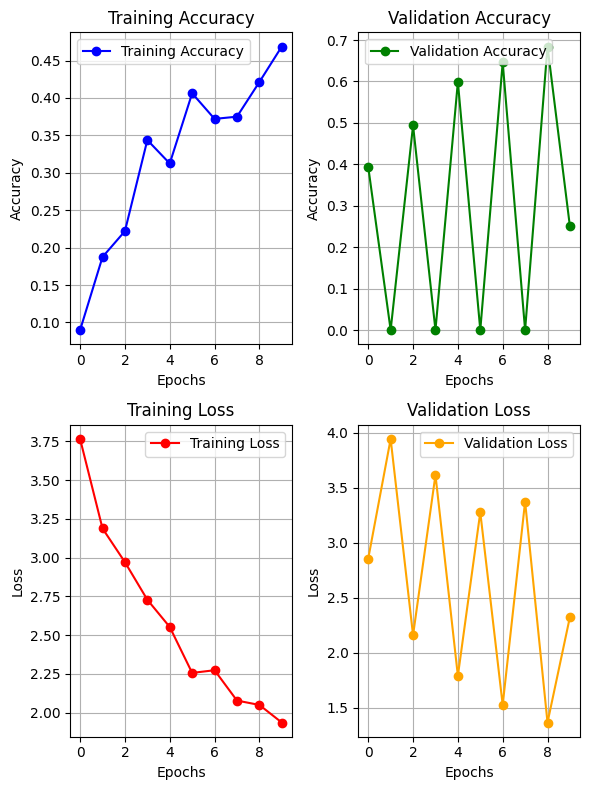

In [36]:
import matplotlib.pyplot as plt

# Extract training and validation metrics from history
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

# Plot all metrics in a 2x2 grid
plt.figure(figsize=(6, 8))

# Training Accuracy
plt.subplot(2, 2, 1)
plt.plot(train_acc, label='Training Accuracy', marker='o', color='blue')
plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Validation Accuracy
plt.subplot(2, 2, 2)
plt.plot(val_acc, label='Validation Accuracy', marker='o', color='green')
plt.title('Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')  # Position the legend in the top-left corner
plt.grid(True)


# Training Loss
plt.subplot(2, 2, 3)
plt.plot(train_loss, label='Training Loss', marker='o', color='red')
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Validation Loss
plt.subplot(2, 2, 4)
plt.plot(val_loss, label='Validation Loss', marker='o', color='orange')
plt.title('Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Adjust layout
plt.tight_layout()
plt.show()


###Evaluation of VGG16 with F1 Score, Precision, Recall which will help me for the comparision.

In [31]:
from sklearn.metrics import confusion_matrix, classification_report, f1_score, precision_score, recall_score
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure all test samples are processed
test_generator.reset()  # Reset generator to predict all test samples
test_pred = model.predict(test_generator, verbose=1)  # Predict for all test samples

# Convert predictions to class labels
test_pred_classes = np.argmax(test_pred, axis=1)

# Extract true labels directly from the generator
true_labels = test_generator.classes

# Handle mismatch if it occurs
assert len(test_pred_classes) == len(true_labels), \
    f"Mismatch between predictions ({len(test_pred_classes)}) and true labels ({len(true_labels)})!"

# Confusion Matrix
cm = confusion_matrix(true_labels, test_pred_classes)

# Classification Report (Precision, Recall, F1-Score)
report = classification_report(true_labels, test_pred_classes, target_names=test_generator.class_indices.keys())
print("Classification Report:")
print(report)

# Overall Metrics
f1 = f1_score(true_labels, test_pred_classes, average='weighted')
precision = precision_score(true_labels, test_pred_classes, average='weighted')
recall = recall_score(true_labels, test_pred_classes, average='weighted')

print(f"Weighted F1 Score: {f1:.4f}")
print(f"Weighted Precision: {precision:.4f}")
print(f"Weighted Recall: {recall:.4f}")


29/29 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step
Classification Report:
                                               precision    recall  f1-score   support

             Alstonia Scholaris (P2)_diseased       0.75      0.80      0.77        15
              Alstonia Scholaris (P2)_healthy       0.56      0.33      0.42        15
                           Apple___Apple_scab       1.00      0.47      0.64        15
                            Apple___Black_rot       0.68      1.00      0.81        15
                     Apple___Cedar_apple_rust       0.88      0.93      0.90        15
                              Apple___healthy       0.86      0.80      0.83        15
                          Arjun (P1)_diseased       0.82      0.93      0.88        15
                           Arjun (P1)_healthy       0.59      0.67      0.62        15
                    Background_without_leaves       1.00      0.93      0.97        15
                           Bael (P4)_diseased       1.00      0.87 

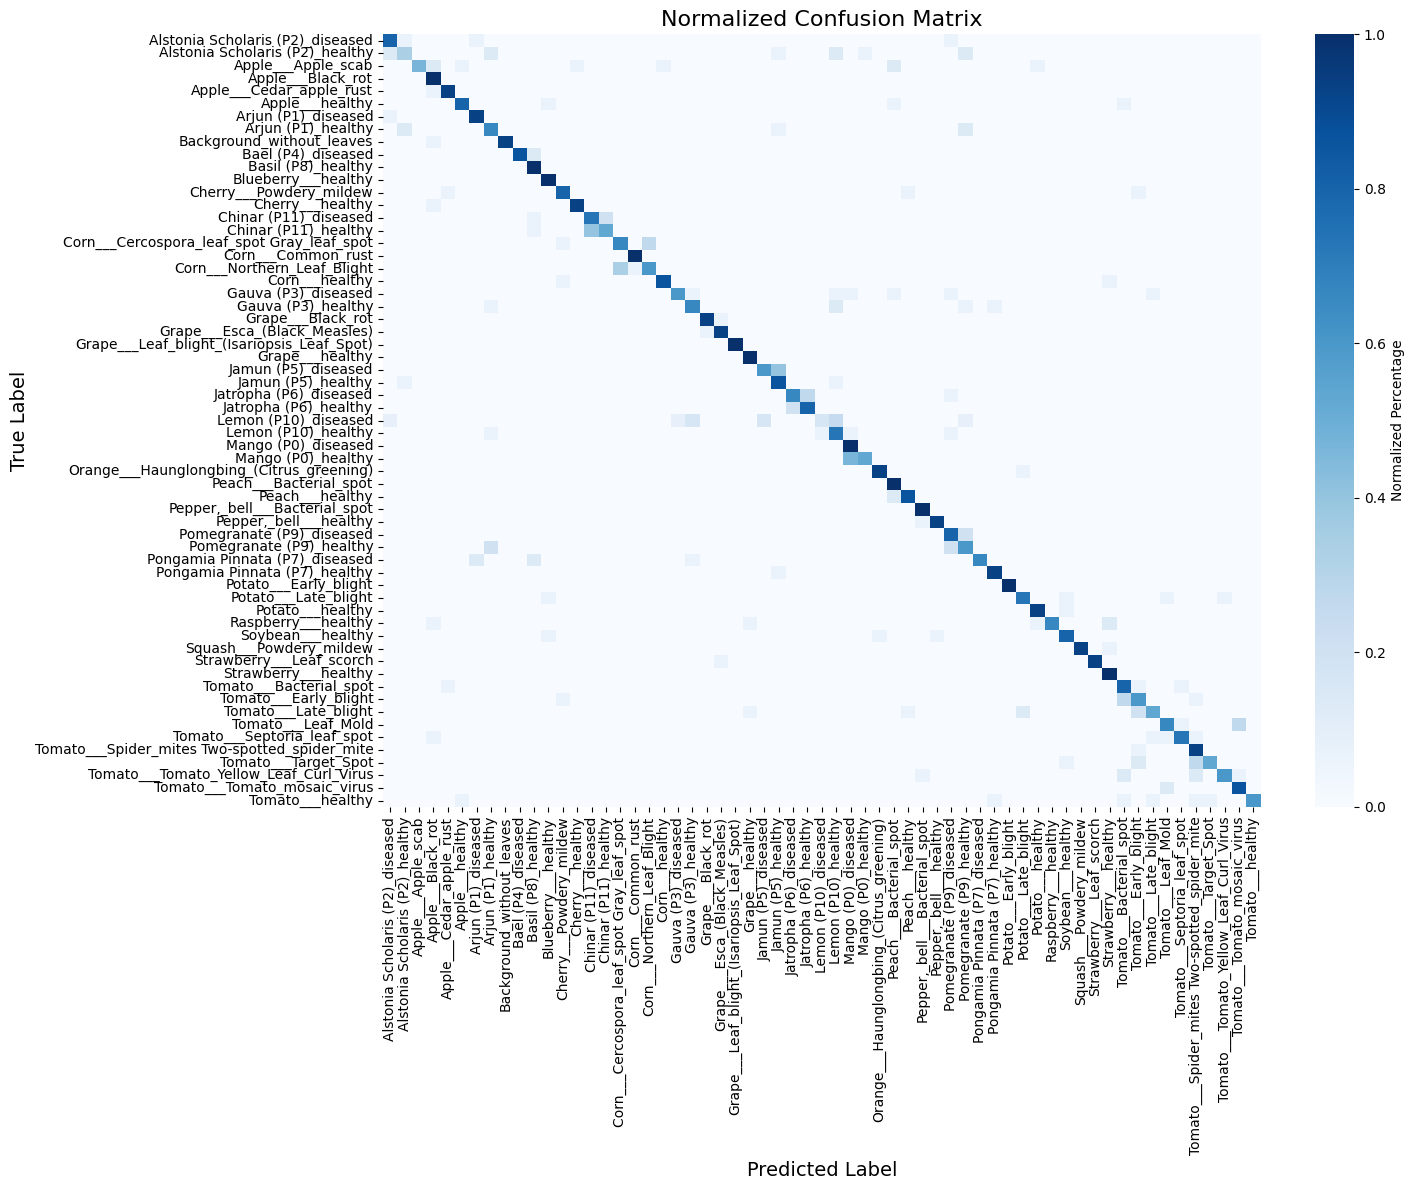

<Figure size 640x480 with 0 Axes>

In [32]:
# Normalize confusion matrix to percentages
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Plot Confusion Matrix
plt.figure(figsize=(15, 12))  # Dynamically adjust size based on label count
sns.heatmap(
    cm_normalized,
    annot=False,  # Turn off annotations if there are too many labels
    cmap='Blues',
    xticklabels=test_generator.class_indices.keys(),
    yticklabels=test_generator.class_indices.keys(),
    cbar_kws={'label': 'Normalized Percentage'}
)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)

# Add titles and labels
plt.title('Normalized Confusion Matrix', fontsize=16)
plt.xlabel('Predicted Label', fontsize=14)
plt.ylabel('True Label', fontsize=14)

# Adjust layout for better fit
plt.tight_layout()

# Show the plot
plt.show()

# Optional: Save the confusion matrix to a file
plt.savefig('confusion_matrix_large_labels.png', dpi=300)


###Final model summary with evaluation metrics.

In [37]:
# Final model summary
model.summary()

# Final evaluation metrics
final_test_loss, final_test_acc = model.evaluate(test_generator)
print(f"Final Test Accuracy: {final_test_acc*100:.2f}%")


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 7, 7, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 512)                 │      12,845,568 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 61)                  │          31,293 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 67,504,125 (257.51 MB)

 Trainable params: 19,956,285 (76.13 MB)

 Non-trainable params: 7,635,264 (29.13 MB)

 Optimizer params: 39,912,576 (152.25 MB)

29/29 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.7808 - loss: 0.6541
Final Test Accuracy: 78.84%


# **###ResNet50**

In [53]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import numpy as np
from sklearn.utils import class_weight
import matplotlib.pyplot as plt

# Define the data directory for plant disease detection dataset
data_dir = '/content/drive/MyDrive/split_limited_dataset'

print(os.listdir("/content/drive/MyDrive/split_limited_dataset"))


['train', 'val', 'test']


In [66]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.utils import class_weight
import numpy as np

data_dir = '/content/drive/MyDrive/split_limited_dataset'

# Set up ImageDataGenerators
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    validation_split=0.2
)

# Define data generators for train, validation, and test
train_generator = train_datagen.flow_from_directory(
    data_dir + '/train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',  # Use 'categorical' for multi-class classification
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    data_dir + '/val',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',  # Use 'categorical' for multi-class classification
    subset='validation'
)

# Testing generator for evaluation
test_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
    data_dir + '/test',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'  # Use 'categorical' for multi-class classification
)

# Check the class labels from the generator
class_labels = train_generator.class_indices
print("Class labels:", class_labels)

# Calculate class weights to handle class imbalance
class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(train_generator.classes),
    y=train_generator.classes
)
class_weights = {i: class_weights[i] for i in range(len(class_weights))}
print("Class weights:", class_weights)

# Now proceed with model setup and training...


Found 3403 images belonging to 61 classes.
Found 182 images belonging to 61 classes.
Found 912 images belonging to 61 classes.
Class labels: {'Alstonia Scholaris (P2)_diseased': 0, 'Alstonia Scholaris (P2)_healthy': 1, 'Apple___Apple_scab': 2, 'Apple___Black_rot': 3, 'Apple___Cedar_apple_rust': 4, 'Apple___healthy': 5, 'Arjun (P1)_diseased': 6, 'Arjun (P1)_healthy': 7, 'Background_without_leaves': 8, 'Bael (P4)_diseased': 9, 'Basil (P8)_healthy': 10, 'Blueberry___healthy': 11, 'Cherry___Powdery_mildew': 12, 'Cherry___healthy': 13, 'Chinar (P11)_diseased': 14, 'Chinar (P11)_healthy': 15, 'Corn___Cercospora_leaf_spot Gray_leaf_spot': 16, 'Corn___Common_rust': 17, 'Corn___Northern_Leaf_Blight': 18, 'Corn___healthy': 19, 'Gauva (P3)_diseased': 20, 'Gauva (P3)_healthy': 21, 'Grape___Black_rot': 22, 'Grape___Esca_(Black_Measles)': 23, 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 24, 'Grape___healthy': 25, 'Jamun (P5)_diseased': 26, 'Jamun (P5)_healthy': 27, 'Jatropha (P6)_diseased': 28, 'Ja

In [67]:
# Checking class distribution
class_labels = train_generator.class_indices
print("Class labels:", class_labels)
classes = list(train_generator.class_indices.keys())

# Calculating class weights to handle imbalanced data
class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(train_generator.classes),
    y=train_generator.classes
)
class_weights = {i: class_weights[i] for i in range(len(class_weights))}
print("Class weights:", class_weights)


Class labels: {'Alstonia Scholaris (P2)_diseased': 0, 'Alstonia Scholaris (P2)_healthy': 1, 'Apple___Apple_scab': 2, 'Apple___Black_rot': 3, 'Apple___Cedar_apple_rust': 4, 'Apple___healthy': 5, 'Arjun (P1)_diseased': 6, 'Arjun (P1)_healthy': 7, 'Background_without_leaves': 8, 'Bael (P4)_diseased': 9, 'Basil (P8)_healthy': 10, 'Blueberry___healthy': 11, 'Cherry___Powdery_mildew': 12, 'Cherry___healthy': 13, 'Chinar (P11)_diseased': 14, 'Chinar (P11)_healthy': 15, 'Corn___Cercospora_leaf_spot Gray_leaf_spot': 16, 'Corn___Common_rust': 17, 'Corn___Northern_Leaf_Blight': 18, 'Corn___healthy': 19, 'Gauva (P3)_diseased': 20, 'Gauva (P3)_healthy': 21, 'Grape___Black_rot': 22, 'Grape___Esca_(Black_Measles)': 23, 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 24, 'Grape___healthy': 25, 'Jamun (P5)_diseased': 26, 'Jamun (P5)_healthy': 27, 'Jatropha (P6)_diseased': 28, 'Jatropha (P6)_healthy': 29, 'Lemon (P10)_diseased': 30, 'Lemon (P10)_healthy': 31, 'Mango (P0)_diseased': 32, 'Mango (P0)_healthy

# **###ResNet50_Training**

Found 4193 images belonging to 61 classes.
Found 972 images belonging to 61 classes.
Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


131/131 ━━━━━━━━━━━━━━━━━━━━ 278s 2s/step - accuracy: 0.0994 - loss: 11.9026 - val_accuracy: 0.5906 - val_loss: 8.6433 - learning_rate: 1.0000e-04
Epoch 2/20
  1/131 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - accuracy: 0.3438 - loss: 9.5750

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


131/131 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.3438 - loss: 9.5750 - val_accuracy: 0.5000 - val_loss: 9.2253 - learning_rate: 1.0000e-04
Epoch 3/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 279s 2s/step - accuracy: 0.4593 - loss: 8.9046 - val_accuracy: 0.7760 - val_loss: 6.9549 - learning_rate: 1.0000e-04
Epoch 4/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5938 - loss: 7.8457 - val_accuracy: 0.8333 - val_loss: 6.7150 - learning_rate: 1.0000e-04
Epoch 5/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 263s 2s/step - accuracy: 0.6625 - loss: 7.2715 - val_accuracy: 0.8740 - val_loss: 6.0055 - learning_rate: 1.0000e-04
Epoch 6/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8438 - loss: 6.2456 - val_accuracy: 0.7500 - val_loss: 5.9523 - learning_rate: 1.0000e-04
Epoch 7/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 297s 2s/step - accuracy: 0.7393 - loss: 6.2902 - val_accuracy: 0.8802 - val_loss: 5.3833 - learning_rate: 1.0000e-04
Epoch 8/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 342us/step - accuracy: 0.906

Test Loss: 2.8748621940612793
Test Accuracy: 91.89%


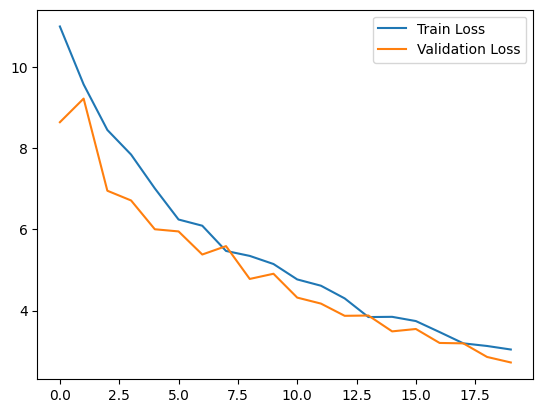

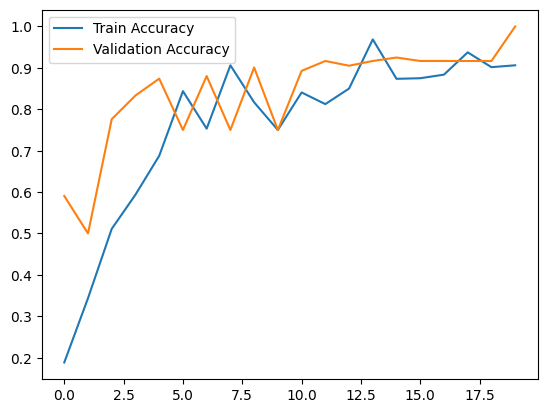

In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.utils import class_weight
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Paths to datasets
train_dir = "/content/drive/MyDrive/split_limited_dataset/train"
val_dir = "/content/drive/MyDrive/split_limited_dataset/val"
test_dir = "/content/drive/MyDrive/split_limited_dataset/test"

# Data generators with preprocessing
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    rotation_range=45,
    width_shift_range=0.3,
    height_shift_range=0.3,
    brightness_range=[0.8, 1.2],
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

validation_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

# Class weights for imbalance
class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(train_generator.classes),
    y=train_generator.classes
)
class_weights = dict(enumerate(class_weights))

# ResNet50 model
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze most layers
for layer in base_model.layers[:-10]:
    layer.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01))(x)
x = Dropout(0.6)(x)
output = Dense(len(train_generator.class_indices), activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)

# Compile with optimizer and loss
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Callbacks
early_stopping = EarlyStopping(
    monitor='val_loss', patience=5, restore_best_weights=True, verbose=1
)
lr_scheduler = ReduceLROnPlateau(
    monitor='val_loss', factor=0.1, patience=3, verbose=1
)

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=20,
    class_weight=class_weights,
    callbacks=[early_stopping, lr_scheduler]
)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Save the model
model.save('resnet50_model_fixed.h5')



###Evaluation of ResNet50 with F1 Score, Precision, Recall which will help me for the comparision.

29/29 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step
Classification Report:
                                               precision    recall  f1-score   support

             Alstonia Scholaris (P2)_diseased       0.00      0.00      0.00        15
              Alstonia Scholaris (P2)_healthy       0.00      0.00      0.00        15
                           Apple___Apple_scab       0.00      0.00      0.00        15
                            Apple___Black_rot       0.00      0.00      0.00        15
                     Apple___Cedar_apple_rust       0.07      0.07      0.07        15
                              Apple___healthy       0.00      0.00      0.00        15
                          Arjun (P1)_diseased       0.00      0.00      0.00        15
                           Arjun (P1)_healthy       0.00      0.00      0.00        15
                    Background_without_leaves       0.00      0.00      0.00        15
                           Bael (P4)_diseased       0.07      0.07 

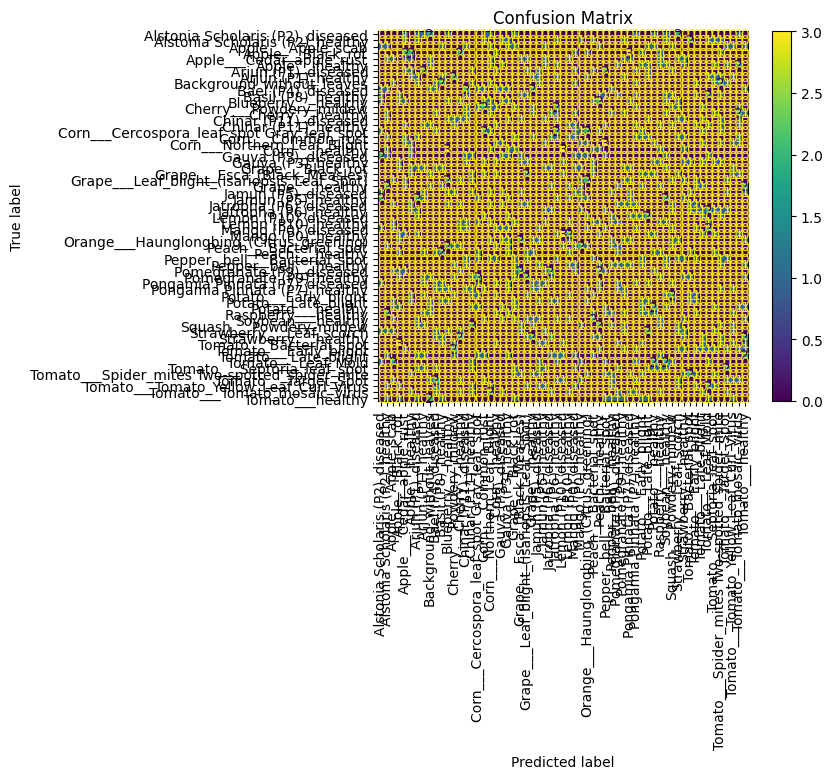

In [5]:
# Adjust predictions to match the number of true labels
test_generator.reset()
predictions = model.predict(test_generator, steps=test_generator.samples // test_generator.batch_size + 1, verbose=1)
predicted_classes = np.argmax(predictions, axis=1)

# Match true labels to predictions
true_classes = test_generator.classes[:len(predicted_classes)]

# Classification report
print("Classification Report:")
report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)

# Confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)
print("Confusion Matrix:")
print(cm)

# Visualize the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
disp.plot(cmap='viridis', xticks_rotation='vertical', values_format='d')
plt.title('Confusion Matrix')
plt.show()


###Final model summary with evaluation metrics

In [2]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam

# Paths to the main directory
data_dir = '/content/drive/MyDrive/12_types'

In [3]:
# Hyperparameters
img_height, img_width = 224, 224
batch_size = 32
epochs = 20
learning_rate = 0.0001


In [4]:
# Data Augmentation and Data Generators
datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # Split for validation
)

train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    subset='training'
)

val_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    subset='validation'
)

Found 3608 images belonging to 12 classes.
Found 894 images belonging to 12 classes.


In [5]:
# Load the pre-trained VGG16 model without the top layer
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom layers
x = Flatten()(base_model.output)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(1, activation='sigmoid')(x)

# Define the model
model = Model(inputs=base_model.input, outputs=output)

# Compile the model
optimizer = Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       6,422,784 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 21,137,729 (80.63 MB)

 Trainable params: 6,423,041 (24.50 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [ ]:
# Train the model
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=val_generator,
    verbose=1
)

# Unfreeze some layers of the base model for fine-tuning
for layer in base_model.layers[-4:]:  # Unfreezing last 4 layers
    layer.trainable = True

# Recompile the model with a lower learning rate for fine-tuning
optimizer_finetune = Adam(learning_rate=learning_rate / 10)
model.compile(optimizer=optimizer_finetune, loss='binary_crossentropy', metrics=['accuracy'])
